# NLP with Deep learning framework for Sentiment Analysis
### NLP

NLP is technique to create system which can process or understand language on order to perform certain tasks. These task could be:

* Question Answering - The main job of technologies like Siri, Alexa, and Cortana
* Sentiment Analysis - Determining the emotional tone behind a piece of text
* Image to Text Mappings - Generating a caption for an input image
* Machine Translation - Translating a paragraph of text to another language
* Speech Recognition - Having computers recognize spoken words

### Sentiment Analysis

Sentiment analysis is an excercise of taking sentence, paragraph, document or any piece of natural language and determine text emotional tone.

![](Images/SentimentAnalysis.png)

### Lets understand how things works in system

System/CPU understands numerical/scalar values for computation.
* CNN uses array of pixel values
* logistics/linear regression uses quantifable features
* NLP uses vector respresentation of each word.

![caption](Images/SentimentAnalysis2.png)


These vectors to be created in such a way that it represents it context and meaning. Similar words should reside relatively in same area.

![caption](Images/SentimentAnalysis8.png)

These vector representations are called as word embeddings.

### Word2Vec

Word2Vec model is used to create those word embeddings.
The Word2Vec model is trained by taking each sentence in the dataset, sliding a window of fixed size over it, and trying to predict the center word of the window, given the other words. Using a loss function and optimization procedure, the model generates vectors for each unique word.

NLP with Deep learning will likely to have word vectors as input.
Lets start our practical excercise to get better understanding.

# Sentiment Analysis with Deep Learning

As mentioned before, the task of sentiment analysis involves taking in an input sequence of words and determining whether the sentiment is positive, negative, or neutral. We can separate this specific task (and most other NLP tasks) into 5 different components.

    1) Training a word vector generation model (such as Word2Vec) or loading pretrained word vectors
    2) Creating an ID's matrix for our training set (We'll discuss this a bit later)
    3) RNN (With LSTM units) graph creation
    4) Training 
    5) Testing

### Loading data

Traning Word2Vec model will take lot of time so we will use a pretrained model. Google provides word2vec model with 100 billion different words :-) which contains 3 million words with a dimensionality of 300.

Another is Glove with 0.4 million with dimensionalty of 50.

We will be importing Glove data as list and embedding matrix for our analysis.

In [1]:
import numpy as np
wordsList = np.load('training_data/wordsList.npy')
wordsList = wordsList.tolist()
wordsList = [word.decode('UTF-8') for word in wordsList]
wordVectors = np.load('training_data/wordVectors.npy')

In [2]:
print('wordsList: ', len(wordsList), '\nwordVectors: ', wordVectors.shape)
print(wordsList.index("going"))
print(wordsList[222:228])

wordsList:  400000 
wordVectors:  (400000, 50)
222
['going', 'number', 'major', 'known', 'points', 'won']


In [45]:
wordVectors[wordsList.index("going")],wordVectors[wordsList.index("walking")]


from scipy.spatial.distance import cosine

cosine(wordVectors[wordsList.index("love")],wordVectors[wordsList.index("hate")])

0.35413944721221924

In [4]:
sentence = 'i thought the movie was incredible and inspiring'
import tensorflow as tf
maxSeqLength = 10
firstSentence = np.zeros((maxSeqLength), dtype = 'int32')
#firstSentence[0] = wordsList.index(i)
for i, word in enumerate(sentence.split()):
    firstSentence[i] = wordsList.index(word)
print(firstSentence.shape)
print(firstSentence)

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [5]:
wordsList[41]

'i'

In [6]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors, firstSentence).eval())

[[  1.18910000e-01   1.52549997e-01  -8.20730031e-02  -7.41439998e-01
    7.59169996e-01  -4.83280003e-01  -3.10090005e-01   5.14760017e-01
   -9.87079978e-01   6.17570011e-04  -1.50429994e-01   8.37700009e-01
   -1.07969999e+00  -5.14599979e-01   1.31879997e+00   6.20069981e-01
    1.37789994e-01   4.71080005e-01  -7.28740022e-02  -7.26750016e-01
   -7.41159976e-01   7.52629995e-01   8.81799996e-01   2.95610011e-01
    1.35479999e+00  -2.57010007e+00  -1.35230005e+00   4.58799988e-01
    1.00680006e+00  -1.18560004e+00   3.47370005e+00   7.78980017e-01
   -7.29290009e-01   2.51020014e-01  -2.61559993e-01  -3.46839994e-01
    5.58409989e-01   7.50980020e-01   4.98299986e-01  -2.68229991e-01
   -2.74430006e-03  -1.82980001e-02  -2.80959994e-01   5.53179979e-01
    3.77059989e-02   1.85550004e-01  -1.50250003e-01  -5.75119972e-01
   -2.66710013e-01   9.21209991e-01]
 [  4.27619994e-01  -1.14689998e-01   1.05060004e-02  -5.46620011e-01
    8.90550017e-01   1.92629993e-01  -6.53739989e-01 

![caption](Images/SentimentAnalysis5.png)

In [8]:
from os import listdir
from os.path import isfile, join

positiveFiles = ['training_data/positiveReviews/' + f for f in listdir('training_data/positiveReviews/')]
negativeFiles = ['training_data/negativeReviews/' + f for f in listdir('training_data/negativeReviews/')]

numWords = []
for pf in positiveFiles:
    with open(pf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        numWords.append(counter)
for nf in negativeFiles:
    with open(nf, 'r', encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        numWords.append(counter)

In [10]:
numFiles = len(numWords)
print(numFiles, max(numWords), min(numWords))
#print(numWords[:10])

25000 2470 10


In [11]:
print('Average number of words in line is {}'.format(int(sum(numWords)/len(numWords))))

Average number of words in line is 233


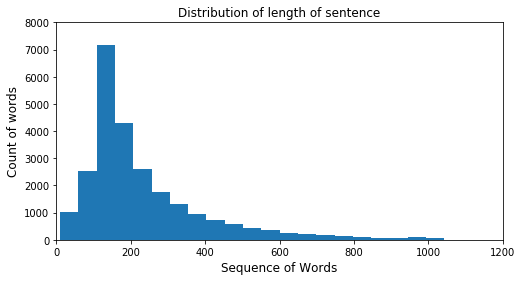

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.hist(numWords, bins=50)
plt.xlabel("Sequence of Words", fontsize = 12)
plt.ylabel("Count of words", fontsize=12)
plt.title("Distribution of length of sentence")
plt.axis([0,1200,0,8000])
plt.show()

In [13]:
fname = positiveFiles[3]
with open(fname, 'r') as f:
    for lines in f:
        print(lines)

It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant.<br /><br />Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade.<br /><br />Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing tha

In [14]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [15]:
fname = positiveFiles[3]
maxSeqLength = 250
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter == len(firstFile):
            break
        else:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    47,      7,   5186,   2518,      4,   3162,   1485,      6,
            7,   2248,   3001,     21,   1108,      5,     44,  48222,
         1813,     41,   1349,    117,    773,      3,      7,   1005,
         3317,     41,    189,     33,     51,    454,      7, 166008,
         2798,    243,   1219,   1160, 399999,   5313,    539,    197,
            4,   3623,  10503,  16632,   2383,    117,    130,  53362,
          523,   1233,      4,      7,     50,    328, 201534,     50,
         4313,   1239,  20155,   4785,  19798,     15,    442,    814,
           34,     31,      4,    465,  16972,    433,   1095,     14,
          332,   1673,    858,     61, 201534,     91,   4251,     14,
        54048,   3926,     46,  23842,     38,     22,    409,    421,
         1237,     14,      7,   1752,    489,  20773,    654,     14,
         1984, 201534,  17224,     26,  91953,    621,      5,  44864,
         6162,     32,  13073,     18, 167360,   1813,     17, 201534,
      

In [ ]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter=0
for pf in positiveFiles:
    with open(pf, 'r', encoding='utf-8') as f:
        line = f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        indexCounter = 0
        for word in split:
            if indexCounter == len(firstFile):
                break
            else:
                try:
                    ids[fileCounter][indexCounter] = wordsList.index(word)
                except ValueError:
                    ids[fileCounter][indexCounter] = 399999 #Vector for unknown words
                indexCounter = indexCounter + 1
        fileCounter = fileCounter+1
        
for nf in negativeFiles:
    with open(nf, 'r', encoding='utf-8') as f:
        line = f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        indexCounter = 0
        for word in split:
            if indexCounter == len(firstFile):
                break
            else:
                try:
                    ids[fileCounter][indexCounter] = wordsList.index(word)
                except ValueError:
                    ids[fileCounter][indexCounter] = 399999 #Vector for unknown words
                indexCounter = indexCounter + 1
        fileCounter = fileCounter+1

np.save('idsMatrix', ids)

In [16]:
ids = np.load('training_data/idsMatrix.npy')
ids.shape

(25000, 250)

### RNN Model 
Lets have a discussion on RNN and LSTM before deep dive in code.

NLP data has a temporal aspect to it which means each word in a sentence depends greatly on what came before and comes after it. In order to account for this dependency, we use a recurrent neural network.  

The recurrent neural network structure is a little different from the traditional feedforward NN you may be accostumed to seeing. The feedforward network consists of input nodes, hidden units, and output nodes with backpropagation of error to train your network.

![caption](Images/SentimentAnalysis17.png)

The main difference between feedforward neural networks and recurrent ones is the temporal aspect of the latter. In RNNs, each word in an input sequence will be associated with a specific time step. In effect, the number of time steps will be equal to the max sequence length. 

![caption](Images/SentimentAnalysis18.png)

Associated with each time step is also a new component called a hidden state vector h<sub>t</sub>. From a high level, this vector seeks to encapsulate and summarize all of the information that was seen in the previous time steps. Just like x<sub>t</sub> is a vector that encapsulates all the information of a specific word, h<sub>t</sub> is a vector that summarizes information from previous time steps.

The hidden state is a function of both the current word vector and the hidden state vector at the previous time step. The sigma indicates that the sum of the two terms will be put through an activation function (normally a sigmoid or tanh).

![caption](Images/SentimentAnalysis15.png)

The 2 W terms in the above formulation represent weight matrices. If you take a close look at the superscripts, you’ll see that there’s a weight matrix W<sup>X</sup> which we’re going to multiply with our input, and there’s a recurrent weight matrix W<sup>H</sup> which is multiplied with the hidden state vector at the previous time step. W<sup>H</sup> is a matrix that stays the same across all time steps, and the weight matrix W<sup>X</sup> is different for each input. 

The magnitude of these weight matrices impact the amount the hidden state vector is affected by either the current vector or the previous hidden state. As an exercise, take a look at the above formula, and consider how h<sub>t</sub> would change if either W<sup>X</sup> or W<sup>H</sup> had large or small values. 

Let's look at a quick example. When the magnitude of W<sup>H</sup> is large and the magnitude of W<sup>X</sup> is small, we know that h<sub>t</sub> is largely affected by h<sub>t-1</sub> and unaffected by x<sub>t</sub>. In other words, the current hidden state vector sees that the current word is largely inconsequential to the overall summary of the sentence, and thus it will take on mostly the same value as the vector at the previous time step. 

The weight matrices are updated through an optimization process called backpropagation through time. 

The hidden state vector at the final time step is fed into a binary softmax classifier where it is multiplied by another weight matrix and put through a softmax function that outputs values between 0 and 1, effectively giving us the probabilities of positive and negative sentiment. 

![](Images/SentimentAnalysis16.png)

### Long Short Term Memory Units (LSTMs)

Long Short Term Memory Units are modules that you can place inside of reucrrent neural entworks. At a high level, they make sure that the hidden state vector h is able to encapsulate information about long term dependencies in the text. As we saw in the previous section, the formulation for h in traditional RNNs is relatively simple. This approach won't be able to effectively connect together information that is separated by more than a couple time steps. We can illiustrate this idea of handling long term dependencies through an example in the field of question answering. The function of question answering models is to take an a passage of text, and answer a question about its content. Let's look at the following example.

![caption](Images/SentimentAnalysis4.png)

Here, we see that the middle sentence had no impact on the question that was asked. However, there is a strong connection between the first and third sentences. With a classic RNN, the hidden state vector at the end of the network might have stored more information about the dog sentence than about the first sentence about the number. Basically, the addition of LSTM units make it possible to determine the correct and useful information that needs to be stored in the hidden state vector.

Looking at LSTM units from a more technical viewpoint, the units take in the current word vector x<sub>t</sub> and output the hidden state vector h<sub>t</sub>. In these units, the formulation for h<sub>t</sub> will be a bit more complex than that in a typical RNN. The computation is broken up into 4 components, an input gate, a forget gate, an output gate, and a new memory container. 

![caption](Images/SentimentAnalysis10.png)

Each gate will take in x<sub>t</sub> and h<sub>t-1</sub> (not shown in image) as inputs and will perform some computation on them to obtain intermediate states. Each intermediate state gets fed into different pipelines and eventually the information is aggregated to form h<sub>t</sub>. For simplicity sake, we won't go into the specific formulations for each gate, but it's worth noting that each of these gates can be thought of as different modules within the LSTM that each have different functions. The input gate determines how much emphasis to put on each of the inputs, the forget gate determines the information that we'll throw away, and the output gate determines the final h<sub>t</sub> based on the intermediate states. For more information on understanding the functions of the different gates and the full equations, check out Christopher Olah's great [blog post](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

Looking back at the first example with question “What is the sum of the two numbers?”, the model would have to be trained on similar types of questions and answers. The LSTM units would then be able to realize that any sentence without numbers will likely not have an impact on the answer to the question, and thus the unit will be able to utilize its forget gate to discard the unnecessary information about the dog, and rather keep the information regarding the numbers.

### We are ready to create tensorflow graph.

We will specify two placeholders, one for inputs into the network and one for the lables. 

Label placehodler represent a set of values either [1,0] or [0,1] depending on each training example is positive or negative.
Each row in input placeholder represent the integrized representation of each words for the line/training example that we include in our batch.

![caption](Images/SentimentAnalysis12.png)


Once we have get input data placeholder, we are going to call tf.nn.lookup() function, to get word vector resprestation for our examples.
This will return us a 3-D tensor of dimensionality - batch size (10 lines/examples), maxSequenceLength (250 average words in a line) and vector representation of each word (vector represtation of a word is 1, 50).

![caption](Images/SentimentAnalysis13.png)

In [17]:
numDimensions = 50
maxSeqLength = 250
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [18]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.25)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [19]:
print("Labels:", labels)
print("Input_data:", input_data)
print("Data:", data)
data.shape

Labels: Tensor("Placeholder:0", shape=(24, 2), dtype=float32)
Input_data: Tensor("Placeholder_1:0", shape=(24, 250), dtype=int32)
Data: Tensor("embedding_lookup:0", shape=(24, 250, 50), dtype=float32)


TensorShape([Dimension(24), Dimension(250), Dimension(50)])

### Comment out optimizer and loss parameters after training

In [20]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [21]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'/'
writer = tf.summary.FileWriter(logdir, sess.graph)

### Adding helper function

In [22]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)
    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
writer.close()

In [27]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-90000


In [24]:
def getSentenceMatrix(sentence):
    arr = np.zeros([batchSize, maxSeqLength])
    sentenceMatrix = np.zeros([batchSize,maxSeqLength], dtype='int32')
    cleanedSentence = cleanSentences(sentence)
    split = cleanedSentence.split()
    for indexCounter,word in enumerate(split):
        try:
            sentenceMatrix[0,indexCounter] = wordsList.index(word)
        except ValueError:
            sentenceMatrix[0,indexCounter] = 399999 #Vector for unkown words
    return sentenceMatrix

In [36]:
inputText = "Its bad its good. and its lovely and car was awesome"
inputMatrix = getSentenceMatrix(inputText)
print(inputMatrix.shape)
inputMatrix

(24, 250)


array([[ 47, 978,  47, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [37]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]

print(predictedSentiment)
if (predictedSentiment[0]>predictedSentiment[1]):
    print("Positive Sentiment")
else:
    print("negative sentiment")

[-1.65980315  3.62634802]
negative sentiment


### Analysis using Keras in progress...

In [ ]:
# A simple LSTM with glove embeddings and two dense layers

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, SpatialDropout1D

nextBatch, nextBatchLabels = getTrainBatch();
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     50,
                     weights=[next_batch],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
nextBatch, nextBatchLabels = getTrainBatch();

In [ ]:
nextBatch